# Introduccion a PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
datos = {"ingreso" : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         "horas_trabajadas" : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}
df = pd.DataFrame(datos)

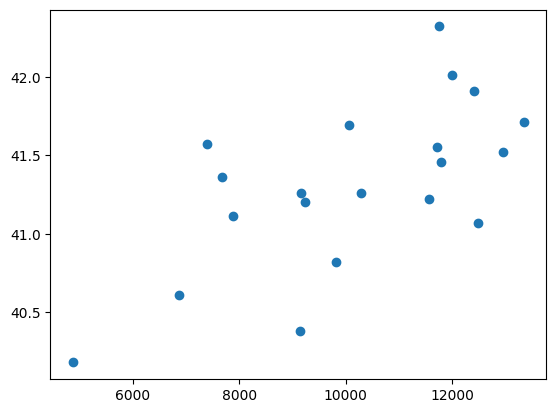

In [5]:
plt.scatter(df["ingreso"], df["horas_trabajadas"])

In [6]:
from sklearn.preprocessing import StandardScaler # El PCA siempre tiene que estandarizarse
df = pd.DataFrame(StandardScaler().fit_transform(df), columns = ["ingreso", "horas_trabajadas"])

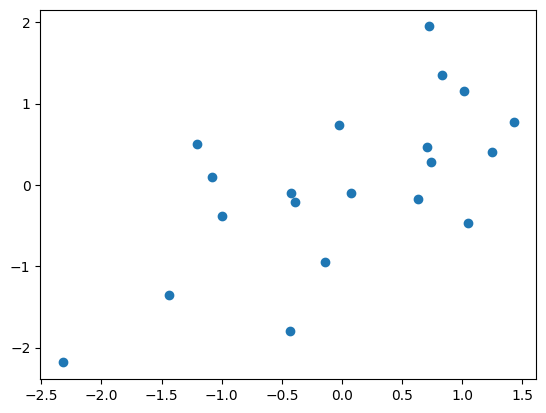

In [7]:
plt.scatter(df["ingreso"],df["horas_trabajadas"])

In [8]:
df.cov()

,ingreso,horas_trabajadas
ingreso,1.052632,0.682360
horas_trabajadas,0.682360,1.052632


In [9]:
from numpy.linalg import eig

In [10]:
valores, vectores = eig(df.cov())

In [11]:
vectores

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [13]:
cp1 = vectores[:,0]
cp2 = vectores[:,1]

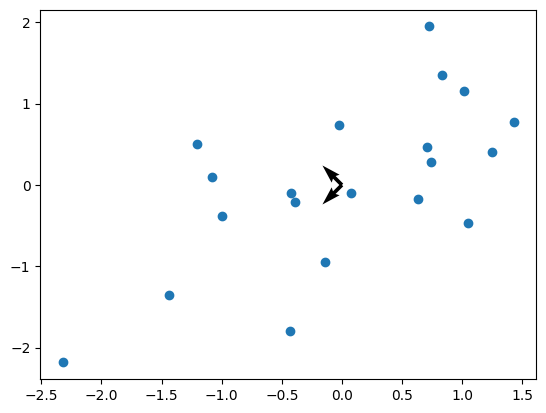

In [16]:
plt.scatter(df["ingreso"],df["horas_trabajadas"])
plt.quiver(0,0,cp1[0]/abs(cp1[0])*valores[0],cp1[1]/abs(cp1[1])*valores[0])

plt.quiver(0,0,cp2[0]/abs(cp2[0])*valores[1],cp2[1]/abs(cp2[1])*valores[1])
plt.show()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [21]:
datos = pd.read_csv("advertising.csv")
datos.head()

modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("regresion", LinearRegression())
])

X = datos[["TV","Radio","Newspaper"]]
Y = datos["Sales"]

modelo.fit(X,Y)
modelo.predict(X)
pca = modelo.named_steps["pca"]
pca.components_
# Por cada variable tenemos un componente

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267],
       [-0.0037659 , -0.70680537,  0.70739804]])

In [25]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)

In [26]:
explained_variance

,0
0,0.456951
1,0.327752
2,0.215297


In [ ]:
lr = modelo.named_steps["regresion"]
lr.coef_

In [ ]:
lr.intercept_

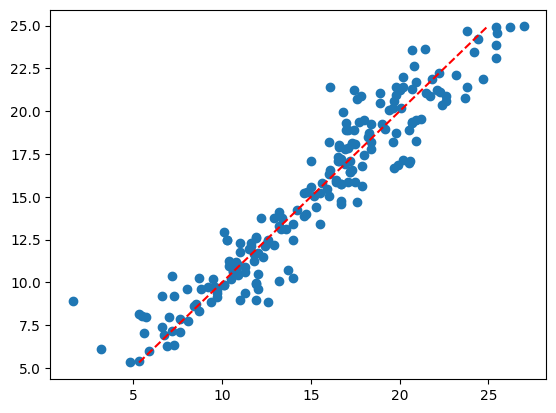

In [29]:
sales_pred = modelo.predict(X)
plt.scatter(datos["Sales"],sales_pred)
plt.plot([sales_pred.min(), sales_pred.max()], [sales_pred.min(), sales_pred.max()], "--r")

In [30]:
from sklearn.metrics import r2_score

In [35]:
r2 = r2_score(["sales_pred"])
print(r2)

TypeError: missing a required argument: 'y_pred'